In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [ ]:
##---------------DATOS DE ENTRENAMIENTO -------------------------##
##Cargar los datos con extención .mat
x = loadmat('/DatosEntrenamiento2.mat')

##Traernos los datos del archivo .mat que nos interesan
y = x['data_te']

##Convertir los datos en un array de Numpy
z = np.array(y)

##Convertir el Array en un DataFrame de Pandas
df = pd.DataFrame(z)

##Contar el numero de datos nulos del dataFrame
np.count_nonzero(pd.isnull(df) == True)

df.columns = ['uplink_size_mean','uplink_size_median','uplink_size_MAD','uplink_size_STD','uplink_size_Skewness','uplink_size_Kurtosis','uplink_size_MAX','uplink_size_MIN','uplink_size_MeanSquare','downlink_size_mean','downlink_size_median','downlink_size_MAD', 'downlink_size_STD','downlink_size_Skewness','downlink_size_Kurtosis','downlink_size_MAX','downlink_size_MIN','downlink_size_MeanSquare','both_links_size_mean','both_links_size_mean','both_links_size_MAD','both_links_size_STD','both_links_size_Skewness','both_links_size_Kurtosis','both_links_size_MAX','both_links_size_MIN','both_links_size_MeanSquare','uplink_interval_mean','uplink_interval_median','uplink_interval_MAD','uplink_interval_STD','uplink_interval_Skewness','uplink_interval_Kurtosis','uplink_interval_MAX','uplink_interval_MIN','uplink_interval_MeanSquare','downlink_interval_mean','downlink_interval_median','downlink_interval_MAD','downlink_interval_STD','downlink_interval_Skewness','downlink_interval_Kurtosis','downlink_interval_MAX','downlink_interval_MIN','downlink_interval_MeanSquare','both_links_interval_mean','both_links_interval_median','both_links_interval_MAD','both_links_interval_STD','both_links_interval_Skewness','both_links_interval_Kurtosis','both_links_interval_MAX','both_links_interval_MIN','both_links_interval_MeanSquare','Label']
df.sample(8)

,uplink_size_mean,uplink_size_median,uplink_size_MAD,uplink_size_STD,uplink_size_Skewness,uplink_size_Kurtosis,uplink_size_MAX,uplink_size_MIN,uplink_size_MeanSquare,downlink_size_mean,downlink_size_median,downlink_size_MAD,downlink_size_STD,downlink_size_Skewness,downlink_size_Kurtosis,downlink_size_MAX,downlink_size_MIN,downlink_size_MeanSquare,both_links_size_mean,both_links_size_mean,both_links_size_MAD,both_links_size_STD,both_links_size_Skewness,both_links_size_Kurtosis,both_links_size_MAX,both_links_size_MIN,both_links_size_MeanSquare,uplink_interval_mean,uplink_interval_median,uplink_interval_MAD,uplink_interval_STD,uplink_interval_Skewness,uplink_interval_Kurtosis,uplink_interval_MAX,uplink_interval_MIN,uplink_interval_MeanSquare,downlink_interval_mean,downlink_interval_median,downlink_interval_MAD,downlink_interval_STD,downlink_interval_Skewness,downlink_interval_Kurtosis,downlink_interval_MAX,downlink_interval_MIN,downlink_interval_MeanSquare,both_links_interval_mean,both_links_interval_median,both_links_interval_MAD,both_links_interval_STD,both_links_interval_Skewness,both_links_interval_Kurtosis,both_links_interval_MAX,both_links_interval_MIN,both_links_interval_MeanSquare,Label
15036,0.119688,0.120656,0.061343,0.090857,0.362027,-1.792145,0.293641,0.000122,0.165612,867.400000,705.207300,589.0,535.2186,0.165815,-2.067716,1646.0,228.0,1095.431000,0.016381,0.041526,0.000350,0.000377,4.065414,20.999450,0.293322,0.000014,0.044425,315.900000,131.404300,240.0,17.7912,1.492768,0.877759,641.0,228.0,341.859700,0.014743,0.039559,0.000376,0.000406,4.337344,23.873510,0.293162,0.000014,0.042031,371.05,297.294100,240.0,17.7912,3.236647,10.760260,1646.0,228.0,474.529300,0.0
5161,0.005680,0.007965,0.000702,0.001018,1.103363,2.587457,0.022088,0.000010,0.009666,108.785714,44.486666,88.0,8.8956,1.185896,2.594986,198.0,76.0,117.229323,0.002319,0.005543,0.000034,0.000042,2.559912,8.257457,0.022109,0.000005,0.005973,1005.888889,732.130608,1606.0,5.9304,-0.446099,1.244172,1610.0,76.0,1241.121681,0.001670,0.004708,0.000021,0.000020,3.248291,12.674424,0.022079,0.000004,0.004974,754.70,740.837398,172.0,142.3296,0.245446,1.094757,1610.0,76.0,1054.952008,1.0
6977,0.005933,0.008491,0.000673,0.000977,1.061313,2.467578,0.022025,0.000005,0.010234,112.285714,47.633522,88.0,17.7912,0.982917,2.124902,198.0,76.0,121.638810,0.002322,0.005581,0.000161,0.000229,2.619858,8.610710,0.022176,0.000001,0.006009,894.333333,732.003964,1025.5,866.5797,-0.127799,1.113882,1610.0,76.0,1152.484201,0.001672,0.004824,0.000029,0.000040,3.257135,12.570514,0.022025,0.000001,0.005083,675.36,713.753792,130.0,80.0604,0.477815,1.310354,1610.0,76.0,980.031204,1.0
12670,0.010944,0.017839,0.003723,0.004412,2.011290,3.061785,0.073764,0.000195,0.020716,503.333300,531.172900,216.0,0.0000,1.502383,0.518992,1676.0,216.0,726.396400,0.006158,0.016427,0.000342,0.000371,3.954772,17.022200,0.101506,0.000085,0.017423,1431.234000,531.983800,1676.0,0.0000,-1.702329,0.961996,1676.0,222.0,1525.456000,0.003950,0.010905,0.000568,0.000618,4.021545,16.479980,0.069340,0.000085,0.011547,1097.19,692.980200,1676.0,0.0000,-0.395956,-1.814938,1676.0,216.0,1295.857000,0.0
3225,0.014926,0.034423,0.001481,0.002187,2.574966,8.189699,0.119776,0.000004,0.036827,125.913043,41.206700,88.0,2.9652,0.086177,1.008589,168.0,86.0,132.205374,0.004544,0.021646,0.000021,0.000021,5.647182,34.247385,0.143775,0.000004,0.021980,1009.272727,589.999568,1318.0,243.1464,-0.812322,1.861498,1602.0,76.0,1167.137591,0.003499,0.017334,0.000019,0.000016,6.193158,41.352881,0.119776,0.000004,0.017598,806.10,638.119562,1254.0,468.5016,-0.122672,1.131815,1602.0,76.0,1026.119788,1.0
9016,0.831686,3.601715,0.000658,0.000976,5.667217,33.402548,24.219873,0.000147,3.660506,692.612245,618.295062,298.0,103.7820,0.876682,-1.162204,1676.0,228.0,924.228702,0.799390,3.683771,0.036046,0.051771,5.398589,29.916062,24.191292,0.000072,3.734047,332.196078,216.707270,250.0,32.6172,2.377447,4.075085,969.0,228.0,395.468647,0.407696,2.536743,0.000634,0.0007

In [ ]:
YEntrenamiento = df['Label']
XEntrenamiento = scaler.fit_transform(df.drop(['Label'],axis=1))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def output_activation_MPC():
    """funcion que entrena un modelo
    con data aleatoria para confirmar la funcion
    de activacion de la ultima capa
    """
    mlp = MLPClassifier()
    # fit with some random data
    xrandom = np.random.rand(10,2)
    yrandom = np.zeros(10)
    # llamar el metodo adecuado para entrenar
    # el mlp con los x y 'y' random
    mlp.fit(xrandom, yrandom )
    # retornar el atributo de mlp adecuado
    return (mlp.out_activation_)

In [ ]:
def experimetar_mlpc(X,Y, num_hidden_layers, num_neurons):
    """ función para realizar experimentos con el MLP
    x: matriz de numpy con caracteristicas
    y: vector numpy con las variables a predecir
    num_hidden_layers: list de enteros con el numero de capdas
        ocultas a usar
    num_neurons: list de enteros con el numero de neuronas a usar
    
    Retorna: dataframe con 4 columnas:
        - numero de capas, numero de neuronas
        - promedio de error prueba (exactitud/eficiencia) de claisficacion y desviación estandar        
    """
    #Validamos el modelo
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            for j, (train, test) in enumerate(skf.split(X, Y)):
                # para almacenar errores intermedios
                Error = np.zeros(Folds)
                Xtrain= X[train,:]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]
                #Normalizamos los datos
                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                # prestar atención a los parametros, correctos.
                hidden_layer_sizes = tuple(hidden_layers*[neurons])
                #print(hidden_layer_sizes)
                mlp = MLPClassifier(activation='tanh', max_iter=400,  hidden_layer_sizes = hidden_layer_sizes)
                # entrenar el MLP
                mlp.fit(X = Xtrain, y=Ytrain)
                #Use para el modelo para hacer predicciones sobre el conjunto Xtest
                Yest = mlp.predict(Xtest)
                #Mida el error absoluto medio para cada una de las dos salidas
                #Observe bien la documentación. recordar que esta resolviendo
                # un problema de multiples salidas
                Error[j] = accuracy_score(Ytest,Yest)
                
        
            print('error para configuracion de params = ' + str(np.mean(Error)) + '+-' + str(np.std(Error)))
        
            resultados.loc[idx,'capas ocultas'] = hidden_layers
            resultados.loc[idx,'neuronas en capas ocultas'] = neurons 
            resultados.loc[idx,'error de prueba(media)'] = np.mean(Error)
            resultados.loc[idx,'intervalo de confianza'] = np.std(Error)
            idx+=1
    return (resultados)

In [ ]:
resultados_mlpc = experimetar_mlpc(XEntrenamiento,YEntrenamiento, [1,2], [12,16,20,24])

error para configuracion de params = 0.24993624075490947+-0.4329022676402703
error para configuracion de params = 0.24993624075490947+-0.4329022676402703
error para configuracion de params = 0.25+-0.4330127018922193
error para configuracion de params = 0.25+-0.4330127018922193
error para configuracion de params = 0.24993624075490947+-0.4329022676402703
error para configuracion de params = 0.24993624075490947+-0.4329022676402703
error para configuracion de params = 0.24993624075490947+-0.4329022676402703
error para configuracion de params = 0.24993624075490947+-0.4329022676402703


In [ ]:
resultados_mlpc

,capas ocultas,neuronas en capas ocultas,error de prueba(media),intervalo de confianza
0,1.0,12.0,0.249936,0.432902
1,1.0,16.0,0.249936,0.432902
2,1.0,20.0,0.250000,0.433013
3,1.0,24.0,0.250000,0.433013
4,2.0,12.0,0.249936,0.432902
5,2.0,16.0,0.249936,0.432902
6,2.0,20.0,0.249936,0.432902
7,2.0,24.0,0.249936,0.432902


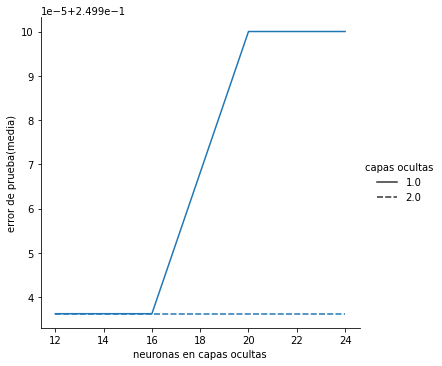

In [ ]:
# ver los resultados
import seaborn as sns
sns.relplot(data = resultados_mlpc,  x='neuronas en capas ocultas', y = 'error de prueba(media)', style= 'capas ocultas', kind = 'line')